In [33]:
import numpy as np
import pandas as pd
from DataProcessing import Data

# 1. Get Data 

## 1.1. Get Data from folder

In [34]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [35]:
chosen_index = 'LIFE'

In [36]:
d.preprocess(chosen_index)

Processing LIFE.csv


Saved LIFE data at data/processed/LIFE.csv


In [37]:
df = d.get_data(chosen_index)
df= df.drop(['Date','Volume'],axis=1)

In [38]:
df.head

<bound method NDFrame.head of        Open   High    Low  Close        RSI        MFI       EMA         SO  \
0     8.120  8.120  7.700  7.882  67.114096  61.338414  7.259851  72.352943   
1     7.840  7.882  7.588  7.854  67.796617  60.303764  7.339071  71.176477   
2     7.812  7.882  7.056  7.294  59.214505  57.942045  7.333062  46.385547   
3     7.546  7.630  7.056  7.420  59.337352  58.236049  7.344653  51.807231   
4     7.000  7.700  6.720  7.014  55.807365  57.595325  7.300566  31.874992   
...     ...    ...    ...    ...        ...        ...       ...        ...   
1240  1.770  1.790  1.630  1.670  36.666668  39.819721  1.855724   8.230446   
1241  1.690  1.720  1.670  1.700  38.043486  39.563852  1.834961  14.403305   
1242  1.720  1.730  1.640  1.660  36.125659  34.215396  1.811633   6.172834   
1243  1.670  1.720  1.575  1.590  26.881728  28.872182  1.782082   2.772641   
1244  1.570  1.660  1.570  1.600  32.500006  36.767824  1.757804   5.882349   

          MACD  Next 

In [39]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [40]:
X = df[df.columns[0:9]].values
Y = df[df.columns[9]].values

## 2.1. Split data chronologically

In [41]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37,shuffle=False)

## 2.2. Scale data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.3. Scikit-learn Model

In [43]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    random_state=1,
    activation='relu',
    solver='adam', 
    max_iter=400,
    hidden_layer_sizes=(100,100,100),
    )
# model.fit(X_train_scaled,Y_train)
# model.score(X_test_scaled,Y_test)
# Y_predict = model.predict(X_test_scaled)

model.fit(X_train,Y_train)
model.score(X_test,Y_test)
Y_predict = model.predict(X_test)

## 2.4. Pytorch Model

In [44]:
# import torch.nn as nn
# import torch
# import torch.optim as optim
# import torch.nn.functional as func

In [45]:
# X_train = torch.FloatTensor(X_train)
# X_test = torch.FloatTensor(X_test)
# Y_train = torch.FloatTensor(Y_train)
# Y_test = torch.FloatTensor(Y_test)

In [46]:
# model = nn.Sequential(
#     nn.Linear(X_train.shape[1],100),
#     nn.ReLU(),
#     nn.Linear(100,1)
# )

In [47]:
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [48]:
# for i in range(400):
#     for j in range(X_train.shape[0]):
#         Y_pred = model(X_train[j])
#         loss = criterion(Y_pred, Y_train[j].reshape(1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

# Y_pred = []
# with torch.no_grad():
#     for i,data in enumerate(X_test):
#         Y_pred.append(model(data).detach().numpy())

# 3. Evaluate model

<Axes: >

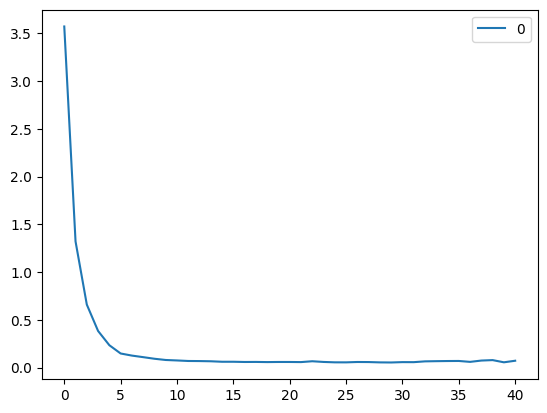

In [49]:
pd.DataFrame(model.loss_curve_).plot()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mse = mean_squared_error(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.08851865961244287
Mean Absolute Error: 0.22607116254346626
R-squared: 0.54541746342384


## Plot Result

In [51]:
import matplotlib.pyplot as plt

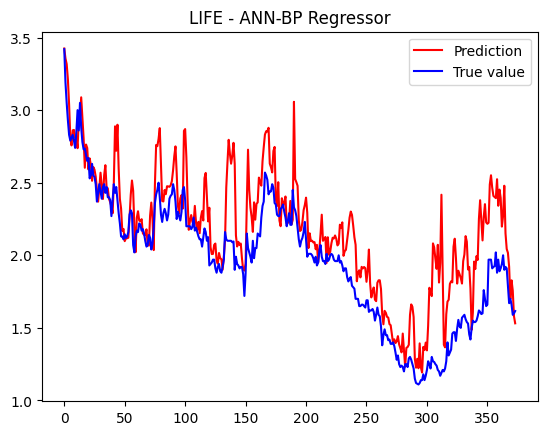

In [52]:
# plt.plot(Y_predict,color='red',label='SKLearn')
# plt.plot(Y_pred,color='orange',label='Pytorch')
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor')
plt.show()

In [53]:
# plt.plot(Y_pred,color='orange',label='Pytorch')
# plt.plot(Y_test,color='blue',label='True value')
# plt.legend(loc='upper right')
# plt.title(f'{chosen_index} - ANN-BP Regressor')
# plt.show()

## Get data

In [54]:
indices = d.get_index_names()
datasets = []
dataset_names = []
for index in indices:
    # d.preprocess(index)
    df = d.get_data(index)
    df= df.drop(['Date','Volume'],axis=1)

    X = df[df.columns[0:9]].values
    Y = df[df.columns[9]].values
    datasets.append((X,Y))
    dataset_names.append(index)

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


## Parameter list

In [55]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
n_max_iter = [200,400,600,800,1000]
hidden_layer_sizes = [(100,100,100),(100,100,100,100),(100,100,100,100,100)]
learning_rates = ['constant', 'invscaling', 'adaptive']
labels = []

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    # {"c": "green", "linestyle": "--"},
    # {"c": "blue", "linestyle": "--"},
    # {"c": "black", "linestyle": "-"},
]

# Plot on datasets


learning on dataset AAPL
Activation Function: identity
Mean Squared Error: 6.808237022220303
Mean Absolute Error: 1.9960644512357233
R-squared: 0.9823923145147759


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 4344.509154580914
Mean Absolute Error: 62.91498520367755
R-squared: -10.235911812686894


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 1837.2637461737631
Mean Absolute Error: 38.37725783912255
R-squared: -3.751591651473108
Activation Function: relu
Mean Squared Error: 6.5344035326969605
Mean Absolute Error: 1.9528332467352638
R-squared: 0.983100511650556

learning on dataset ORCL
Activation Function: identity
Mean Squared Error: 4.477219976296939
Mean Absolute Error: 1.3738753296647805
R-squared: 0.9840467049048087


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 1456.4642377676435
Mean Absolute Error: 34.437229396804334
R-squared: -4.189694476418782


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 566.4329536060517
Mean Absolute Error: 19.607925253897037
R-squared: -1.018322107995262
Activation Function: relu
Mean Squared Error: 4.932917197179956
Mean Absolute Error: 1.4643884366239612
R-squared: 0.9824229579642311

learning on dataset GOOGL
Activation Function: identity
Mean Squared Error: 5.804510879404108
Mean Absolute Error: 1.7904997502191913
R-squared: 0.9837294143022651


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 969.9940268563827
Mean Absolute Error: 25.44273633277854
R-squared: -1.7189837814341278


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 287.45491912778476
Mean Absolute Error: 14.772158936197998
R-squared: 0.19423703511359136
Activation Function: relu
Mean Squared Error: 5.663074682445483
Mean Absolute Error: 1.7620318799828343
R-squared: 0.984125873161795

learning on dataset AMZN
Activation Function: identity
Mean Squared Error: 7.5045204579635145
Mean Absolute Error: 2.070062559738776
R-squared: 0.9875109123283768


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 651.8825835176265
Mean Absolute Error: 21.376522766072274
R-squared: -0.08486861788970224


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 626.7983396623196
Mean Absolute Error: 20.7775825537408
R-squared: -0.043123202917468406
Activation Function: relu
Mean Squared Error: 7.85838830404327
Mean Absolute Error: 2.137373516337557
R-squared: 0.9869220024068682

learning on dataset BK
Activation Function: identity
Mean Squared Error: 0.5521027264370951
Mean Absolute Error: 0.5801865864361714
R-squared: 0.9774110745484467


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 10.19578274213527
Mean Absolute Error: 2.4425126436846973
R-squared: 0.5828461529820591


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 3.5456803680652733
Mean Absolute Error: 1.5442925007903607
R-squared: 0.8549307843014459
Activation Function: relu
Mean Squared Error: 0.5303793934170511
Mean Absolute Error: 0.5467467528457302
R-squared: 0.978299870648614

learning on dataset LIFE
Activation Function: identity
Mean Squared Error: 0.02247017726841261
Mean Absolute Error: 0.12310139488453442
R-squared: 0.8846056839912301
Activation Function: logistic
Mean Squared Error: 0.9389175787863989
Mean Absolute Error: 0.9061024840691417
R-squared: -3.821757768016081
Activation Function: tanh
Mean Squared Error: 0.20571319455906464
Mean Absolute Error: 0.3697366151249178
R-squared: -0.05642839825265189
Activation Function: relu
Mean Squared Error: 0.08851865961244287
Mean Absolute Error: 0.22607116254346626
R-squared: 0.54541746342384

learning on dataset T
Activation Function: identity
Mean Squared Error: 0.07320194994905348
Mean Absolute Error: 0.18959040869218718
R-squared: 0.96769

f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 1168.3734808559466
Mean Absolute Error: 33.70444921879769
R-squared: -32.37849209406806


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 664.6625964420322
Mean Absolute Error: 25.128631619861604
R-squared: -17.988307749256805
Activation Function: relu
Mean Squared Error: 3.4821044545052575
Mean Absolute Error: 1.4311869649854316
R-squared: 0.9005220523147486

learning on dataset VHM
Activation Function: identity
Mean Squared Error: 5736175.610387585
Mean Absolute Error: 1348.1963882565192
R-squared: 0.969858215575493


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 8819426024.425842
Mean Absolute Error: 92893.05456833911
R-squared: -45.34328793817528


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 8813276960.738022
Mean Absolute Error: 92859.95112732335
R-squared: -45.3109765577923
Activation Function: relu
Mean Squared Error: 5886051.184305031
Mean Absolute Error: 1390.9749418825124
R-squared: 0.9690706669461696

learning on dataset CTR
Activation Function: identity
Mean Squared Error: 0.29265205917867765
Mean Absolute Error: 0.40811883377236047
R-squared: 0.9791961975307719
Activation Function: logistic
Mean Squared Error: 7.975719415656089
Mean Absolute Error: 2.0928022425225206
R-squared: 0.4330287928300841
Activation Function: tanh
Mean Squared Error: 6.1165799859775865
Mean Absolute Error: 1.7552882259533138
R-squared: 0.5651897267607444
Activation Function: relu
Mean Squared Error: 0.30588459545172186
Mean Absolute Error: 0.41870946555708366
R-squared: 0.978255534165669

learning on dataset FPT
Activation Function: identity
Mean Squared Error: 1191421.6145855896
Mean Absolute Error: 862.663512130247
R-squared: 0.96578493399915

f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 8129363884.422232
Mean Absolute Error: 89969.674529347
R-squared: -232.4578443476584


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 8123437609.885361
Mean Absolute Error: 89936.73365416248
R-squared: -232.28765449048626
Activation Function: relu
Mean Squared Error: 2068065.1330037648
Mean Absolute Error: 1167.2615043714684
R-squared: 0.9406096178267057

learning on dataset MBB
Activation Function: identity
Mean Squared Error: 0.7022685615814832
Mean Absolute Error: 0.662695425369162
R-squared: 0.796920655256421


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic
Mean Squared Error: 32.196418832005506
Mean Absolute Error: 5.360813318085639
R-squared: -8.310437626268227


f:\bk_ky6\ML\project\stock-market-prediction\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh
Mean Squared Error: 76.69330407566814
Mean Absolute Error: 8.557757644254178
R-squared: -21.177877225249556
Activation Function: relu
Mean Squared Error: 0.6384557899524091
Mean Absolute Error: 0.631823355796711
R-squared: 0.8153737892248856


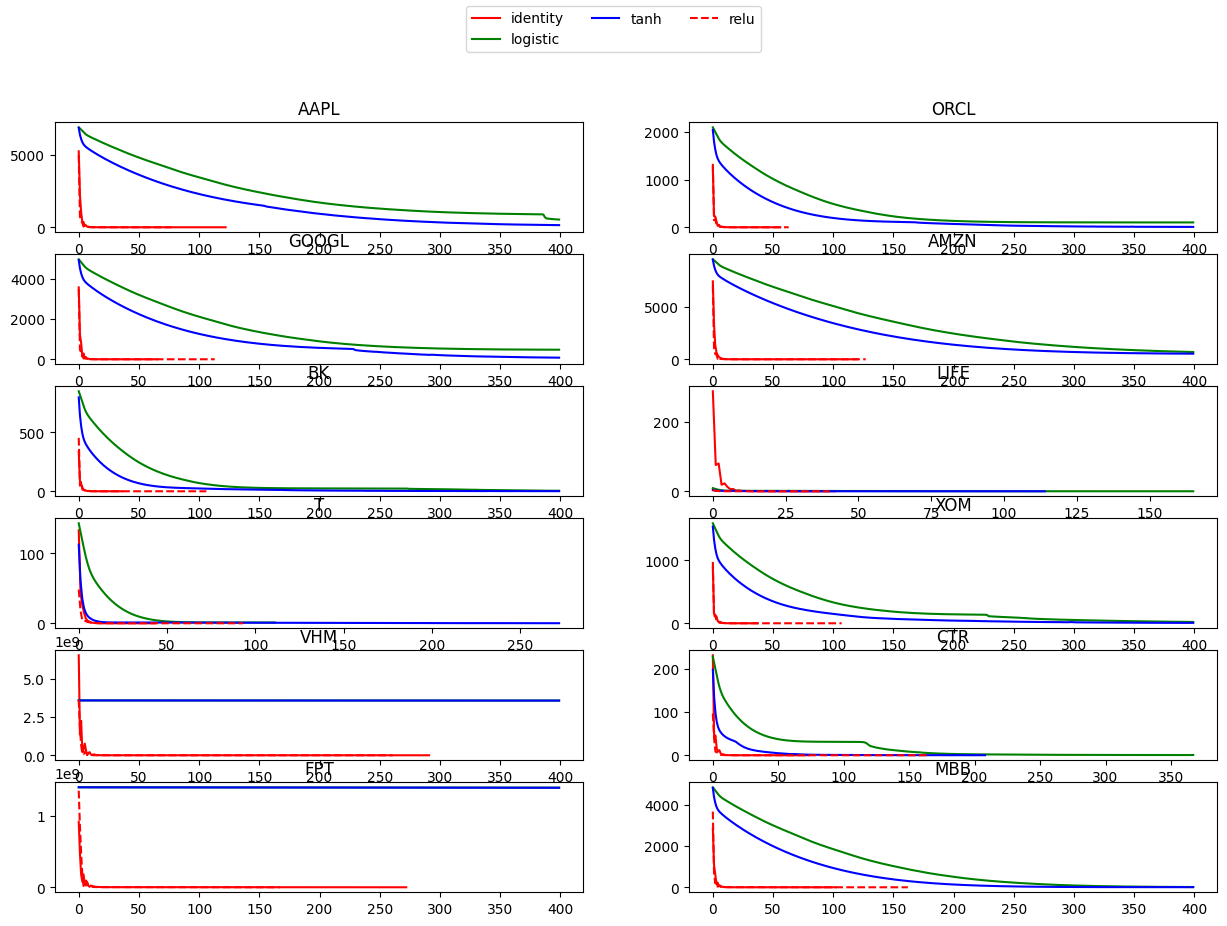

In [56]:
def plot_on_dataset(X, y, ax, name):
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    # X = MinMaxScaler().fit_transform(X)
    models = []

    TRAIN_PERCENT = 0.7
    train_size = int(TRAIN_PERCENT*len(X))

    X_train = X[0:train_size]
    Y_train = y[0:train_size]
    X_test = X[train_size:len(X)]
    Y_test = y[train_size:len(Y)]
    
    for activation in activation_functions:
        model = MLPRegressor(
            random_state=1,
            activation=activation,
            solver='adam', 
            max_iter=400,
            hidden_layer_sizes=(100,100,100),
            )
        model.fit(X_train,Y_train)
        Y_predict = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_predict)
        mae = mean_absolute_error(Y_test, Y_predict)
        r2 = r2_score(Y_test, Y_predict)

        print("Activation Function:", activation)

        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("R-squared:", r2)
        # plot across datasets
        models.append(model)
        labels.append(activation)

    for model, label, args in zip(models, labels, plot_args):
        ax.plot(model.loss_curve_, label=label, **args)

fig, axes = plt.subplots(6, 2, figsize=(15, 10))

for ax, data, name in zip(
    axes.ravel(), datasets, dataset_names
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

 
        